The fuzzy sets A and B are all defined on the universe X = [0, 5] with the following membership functions
mu_a(x) = 1/(1+2*(x-5)**2)
mu_b(x) = 1/(3**x)
a. Sketch the membership functions
b. Express Zadeh notation for the following lambda-cut for each of fuzzy sets A and B
(i) lambda = 0.4
(ii) lambda = 0.5

In [1]:
pip install -U sympy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

In [3]:
x = np.linspace(0, 5, 100)

In [4]:
a_x = 1 / (1 + 2 * (x - 5) ** 2)
b_x = 1 / (3 ** x)

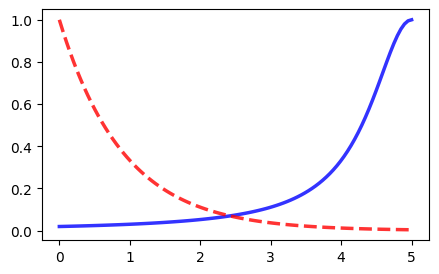

In [5]:
plt.figure(figsize=(5, 3))
plt.plot(x, a_x,
        label='mu_a',
        color="blue",
        linewidth=2.5,
        linestyle='-',
        alpha=.8)
plt.plot(x, b_x,
        label='mu_b',
        color="red",
        linewidth=2.5,
        linestyle='--',
        alpha=.8)
plt.show()

In [6]:
lambda_03 = .3
lambda_05 = .5

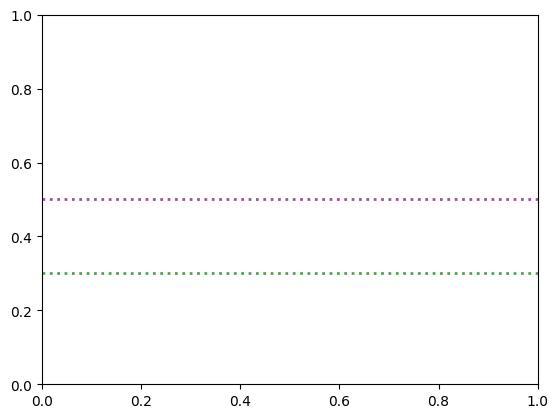

In [7]:
plt.axhline(
    y=lambda_03,
    color='green',
    linestyle=':',
    linewidth=2,
    alpha=.7
)
plt.axhline(
    y=lambda_05,
    color='purple',
    linestyle=':',
    linewidth=2,
    alpha=.7
)

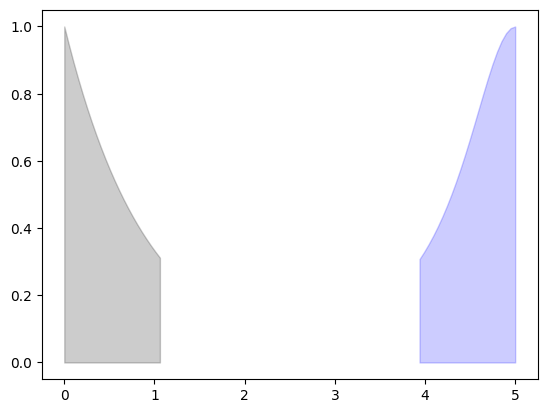

In [8]:
mask_a_03 = a_x >= lambda_03
plt.fill_between(
    x, 0, a_x,
    where=mask_a_03,
    color='blue',
    alpha=.2,
    label='a_03'
)

mask_b_03 = b_x >= lambda_03
plt.fill_between(
    x, 0, b_x,
    where=mask_b_03,
    color='black',
    alpha=.2,
    label='b_03'
)

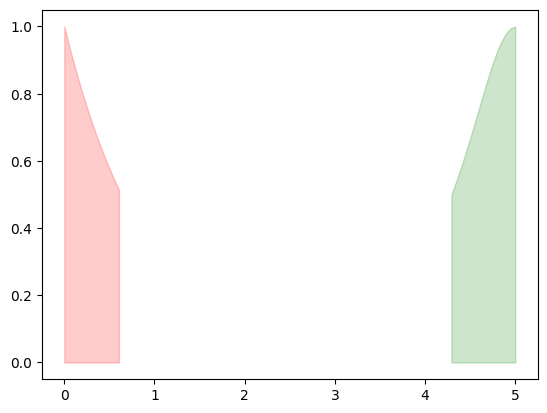

In [9]:
mask_a_05 = a_x >= lambda_05
plt.fill_between(
    x, 0, a_x,
    where=mask_a_05,
    color='green',
    alpha=.2,
    label='a_05'
)

mask_b_05 = b_x >= lambda_05
plt.fill_between(
    x, 0, b_x,
    where=mask_b_05,
    color='red',
    alpha=.2,
    label='b_05'
)

In [10]:
def calculate_lambda_cut(
    function: np.ndarray,
    lambda_value: float,
) -> list:
    """
    Calculate lambda-cut

    Args:
        function: expression
        lambda_value: lambda value

    Returns:
        Intervals where function >= lambda_value
    """
    x_dom = sp.symbols('x')
    
    solving = sp.solve(
        sp.Eq(
            sp.sympify(function),
            lambda_value
        ),
        x_dom
    )

    real_solutions = [
        float(solution) for solution in solving
        if (solution.is_real 
            and x[0] <= float(solution) <= x[-1])
    ]
    real_solutions.sort()

    test_points = [x[0]] + real_solutions + [x[-1]]

    intervals = list()
    for i in range(len(test_points)-1):
        test = (test_points[i] + test_points[i+1]) / 2

        func_num = sp.lambdify(
            x_dom, function, 'numpy'
        )
        if func_num(test) >= lambda_value:
            intervals.append((test_points[i], test_points[i+1]))
    
    return intervals

In [11]:
a_func = "1 / (1 + 2 * (x - 5) ** 2)"
b_func = "1 / (3 ** x)"

a_interval_03 = calculate_lambda_cut(a_func, lambda_03)
b_interval_03 = calculate_lambda_cut(b_func, lambda_03)

print(a_interval_03)
print(b_interval_03)

a_interval_05 = calculate_lambda_cut(a_func, lambda_05)
b_interval_05 = calculate_lambda_cut(b_func, lambda_05)

print(a_interval_05)
print(b_interval_05)

[(3.9198765502653568, np.float64(5.0))]
[(np.float64(0.0), 1.0959032742893846)]
[(4.292893218813452, np.float64(5.0))]
[(np.float64(0.0), 0.6309297535714574)]
